In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [23]:
topk = pd.read_csv("efficiency-topk.csv")
switch8 = pd.read_csv("efficiency-switch8.csv")
switch = pd.read_csv("efficiency-switch.csv")

In [24]:
#topk = topk[['Step', 'royal-water-4 - AutoEncoderTopK-0/l2_loss']] ## k = 128
topk = topk[['Step', 'vivid-bee-2 - AutoEncoderTopK-0/l2_loss']] ## k = 64
#topk = topk[['Step', 'still-river-1 - AutoEncoderTopK-0/l2_loss']] ## k = 32
#topk = topk[['Step', 'drawn-voice-3 - AutoEncoderTopK-0/l2_loss']] ## k = 8

topk.columns = ['step', 'loss']

In [25]:
#switch8 = switch8[['Step', 'fiery-snowball-4 - SwitchAutoEncoder-1/l2_loss']] ## k = 128
switch8 = switch8[['Step', 'fiery-snowball-4 - SwitchAutoEncoder-0/l2_loss']] ## k = 64
#switch8 = switch8[['Step', 'fanciful-sky-3 - SwitchAutoEncoder-1/l2_loss']] ## k = 32
#switch8 = switch8[['Step', 'fanciful-sky-3 - SwitchAutoEncoder-0/l2_loss']] ## k = 8

switch8.columns = ['step', 'loss']

In [26]:
switch4lb = switch[['Step', 'vague-bee-2 - SwitchAutoEncoder-0/l2_loss']]

switch4lb.columns = ['step', 'loss']

In [27]:
switch8lb = switch[['Step', 'sandy-bush-4 - SwitchAutoEncoder-0/l2_loss']]

switch8lb.columns = ['step', 'loss']

In [28]:
## check if l2 loss spikes at the end (cuz eval changes)

In [29]:
topk = topk[topk['step'] > 9999]
switch8 = switch8[switch8['step'] > 9999]
switch4lb = switch4lb[switch4lb['step'] > 9999]
switch8lb = switch8lb[switch8lb['step'] > 9999]

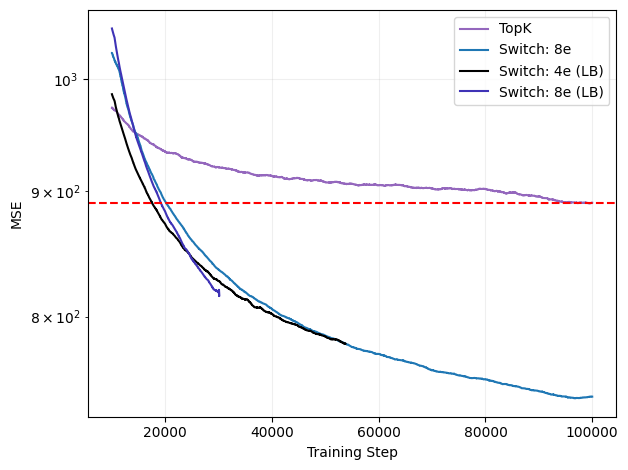

In [30]:
topk_smooth = pd.Series(topk['loss']).rolling(window=1000, center=True, min_periods=1).mean()
switch8_smooth = pd.Series(switch8['loss']).rolling(window=1000, center=True, min_periods=1).mean()
switch4lb_smooth = pd.Series(switch4lb['loss']).rolling(window=1000, center=True, min_periods=1).mean()
switch8lb_smooth = pd.Series(switch8lb['loss']).rolling(window=1000, center=True, min_periods=1).mean()

plt.plot(topk['step'], topk_smooth, label='TopK',  color='#9467bd')
plt.plot(switch8['step'], switch8_smooth, label='Switch: 8e',  color='#1f77b4')
plt.plot(switch4lb['step'], switch4lb_smooth, label='Switch: 4e (LB)',  color='#000000')
plt.plot(switch8lb['step'], switch8lb_smooth, label='Switch: 8e (LB)',  color='#3f33b6')

plt.axhline(y=list(topk_smooth)[-1], color='r', linestyle='--')

#plt.xscale('log')
plt.yscale('log')

plt.xlabel("Training Step")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("efficiency.png")
plt.show()